# IMPORT DEPENDENCIES

In [70]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [16]:
# DIRECTORY
dir_name = "C:\\Users\\Utilizador\\AI\\CNN\\cell_images"

In [17]:
paths = []
for pasta in os.listdir(dir_name):
    print(pasta)
    caminho_completo_pasta = os.path.join(dir_name, pasta)
    

    if not os.path.isdir(caminho_completo_pasta):
        continue

    for imagem in os.listdir(caminho_completo_pasta):
        print(os.path.join(caminho_completo_pasta, imagem))
        print('  ', imagem)
        paths.append(os.path.join(caminho_completo_pasta, imagem))

test
C:\Users\Utilizador\AI\CNN\cell_images\test\parasitized
   parasitized
C:\Users\Utilizador\AI\CNN\cell_images\test\uninfected
   uninfected
train
C:\Users\Utilizador\AI\CNN\cell_images\train\parasitized
   parasitized
C:\Users\Utilizador\AI\CNN\cell_images\train\uninfected
   uninfected


In [18]:
paths

['C:\\Users\\Utilizador\\AI\\CNN\\cell_images\\test\\parasitized',
 'C:\\Users\\Utilizador\\AI\\CNN\\cell_images\\test\\uninfected',
 'C:\\Users\\Utilizador\\AI\\CNN\\cell_images\\train\\parasitized',
 'C:\\Users\\Utilizador\\AI\\CNN\\cell_images\\train\\uninfected']

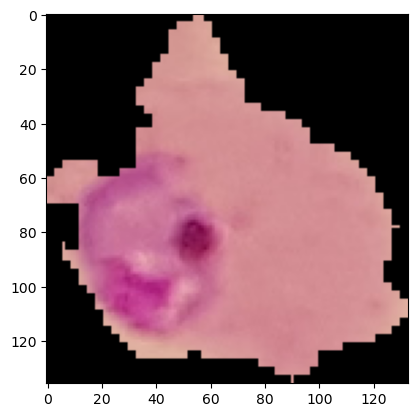

In [27]:
image_parasitized_test_0 = imread(paths[0]+'\\'+(os.listdir(paths[0])[0]))
plt.imshow(image_parasitized_test_0)

In [32]:
# number of images - train
print("Train_parati: ",len(os.listdir(paths[2]))," - Train_uninfected: ",len(os.listdir(paths[3])))

Train_parati:  12480  - Train_uninfected:  12480


In [33]:
# number of images - test
print("Train_parati: ",len(os.listdir(paths[0]))," - Train_uninfected: ",len(os.listdir(paths[1])))

Train_parati:  1300  - Train_uninfected:  1300


In [34]:
# Lets make a function to determine the average dimensions of this images

In [37]:
dim1 = []
dim2 = []
colors = []
for image in os.listdir(paths[0]):
    img = imread(paths[0]+'\\'+image)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)
    colors.append(color)

In [50]:
print(np.mean(dim1), np.max(dim1), np.min(dim1))

134.64307692307693 385 52


In [51]:
print(np.mean(dim2), np.max(dim2), np.min(dim2))

133.31846153846155 250 58


In [46]:
np.mean(color) # -> all 3 color channels

3.0

In [52]:
# Conidering this, lets fix the avg mean at:
image_shape = (130,130,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [66]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more infor

In [72]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

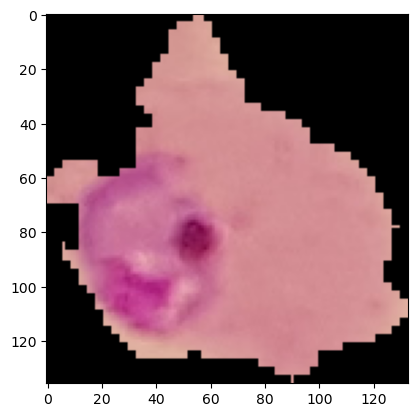

In [73]:
# test to see the effect
image_parasitized_test_0 = imread(paths[0]+'\\'+(os.listdir(paths[0])[0]))
plt.imshow(image_parasitized_test_0)

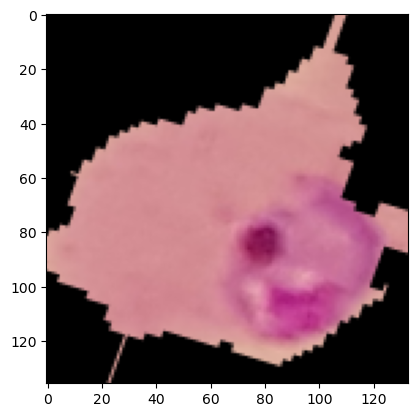

In [74]:
plt.imshow(image_gen.random_transform(image_parasitized_test_0))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [77]:
caminho_completo_pasta = []
for pasta in os.listdir(dir_name):
    print(pasta)
    caminho_completo_pasta.append(os.path.join(dir_name, pasta))
    print(caminho_completo_pasta)

test
['C:\\Users\\Utilizador\\AI\\CNN\\cell_images\\test']
train
['C:\\Users\\Utilizador\\AI\\CNN\\cell_images\\test', 'C:\\Users\\Utilizador\\AI\\CNN\\cell_images\\train']


In [78]:
image_gen.flow_from_directory(caminho_completo_pasta[0])

Found 2600 images belonging to 2 classes.


In [79]:
image_gen.flow_from_directory(caminho_completo_pasta[1])

Found 24958 images belonging to 2 classes.


# CREATING THE MODEL

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [81]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, it's binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [84]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.src.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.src.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
      directory: string, path to the target directory. It should contain
        one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
        inside each of the subdirectories directory tree will be included
        in the generator. See [this script](
        https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
        for more details.
      target_size: Tuple of integers `(height, width)`. The dimensions to
        which all images found will be

In [85]:
batch_size = 16 # bcs we have a lot of data, so it's important to divide into batches to feed the dnn

In [86]:
image_shape[:2]

(130, 130)

In [88]:
test_image_gen = image_gen.flow_from_directory(caminho_completo_pasta[0],
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2600 images belonging to 2 classes.


In [89]:
train_image_gen = image_gen.flow_from_directory(caminho_completo_pasta[1],
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [90]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [91]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20


1560/1560 [==============================] - 239s 152ms/step - loss: 0.6854 - accuracy: 0.5544 - val_loss: 0.6739 - val_accuracy: 0.6046
Epoch 2/20
1560/1560 [==============================] - 164s 105ms/step - loss: 0.3872 - accuracy: 0.8370 - val_loss: 0.2161 - val_accuracy: 0.9315
Epoch 3/20
1560/1560 [==============================] - 169s 108ms/step - loss: 0.1993 - accuracy: 0.9412 - val_loss: 0.1838 - val_accuracy: 0.9412
Epoch 4/20
1560/1560 [==============================] - 161s 104ms/step - loss: 0.1800 - accuracy: 0.9446 - val_loss: 0.1830 - val_accuracy: 0.9450
Epoch 5/20
1560/1560 [==============================] - 186s 119ms/step - loss: 0.1721 - accuracy: 0.9475 - val_loss: 0.1694 - val_accuracy: 0.9465
Epoch 6/20
1560/1560 [==============================] - 180s 115ms/step - loss: 0.1662 - accuracy: 0.9488 - val_loss: 0.1565 - val_accuracy: 0.9481
Epoch 7/20
1560/1560 [==============================] - 176s 113ms/step - loss: 0.1629 - accuracy: 0.9490 - va

# Evaluating the Model

<Axes: >

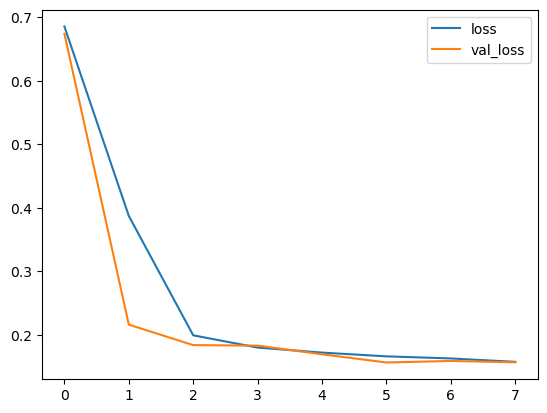

In [95]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

In [96]:
model.metrics_names
model.evaluate_generator(test_image_gen)

[0.16759349405765533, 0.9430769085884094]

In [97]:
from tensorflow.keras.preprocessing import image

In [98]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [99]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [112]:
len(test_image_gen.classes)

2600

In [100]:
predictions = pred_probabilities > 0.5

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1300
           1       0.50      0.52      0.51      1300

    accuracy                           0.50      2600
   macro avg       0.50      0.50      0.50      2600
weighted avg       0.50      0.50      0.50      2600



In [103]:
confusion_matrix(test_image_gen.classes,predictions)

array([[631, 669],
       [625, 675]], dtype=int64)

# Testing Prediction on an Image

In [104]:
# random image
image_parasitized_test_0 # parasitized_test

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [107]:
my_image = image.load_img(paths[0]+'\\'+(os.listdir(paths[0])[0]),target_size=image_shape) # transform into PIL.Image.image
my_image = image.img_to_array(my_image) # transform into an array (pixels)

In [108]:
my_image.shape

(130, 130, 3)

In [109]:
my_image = my_image.reshape(1,130,130,3)

In [110]:
model.predict(my_image) # should predict 0 -> parasitized

1/1 [==============================] - 0s 143ms/step


array([[0.]], dtype=float32)

In [111]:
# saving the model
model.save('malaria.h5')